In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Data Generation

In [55]:
def gen_xor_data(n_samples, data_type='numpy', transpose=False, seed=21):
    np.random.seed(seed)
    x1 = np.random.uniform(low=-5, high=5, size=n_samples)
    x2 = np.random.uniform(low=-5, high=5, size=n_samples)
    prod = x1 * x2
    target = np.fromiter(map(lambda x: int(x >= 0), x1 * x2), dtype=int)
    target = target.reshape(n_samples, 1)
    features = np.column_stack([x1, x2])

    if data_type == 'numpy':
        if transpose:
            features = features.T
        return features, target
    
    elif data_type == 'torch':
        features = torch.tensor(features, dtype=torch.float32)
        target = torch.tensor(target, dtype=torch.float32)
        return features, target

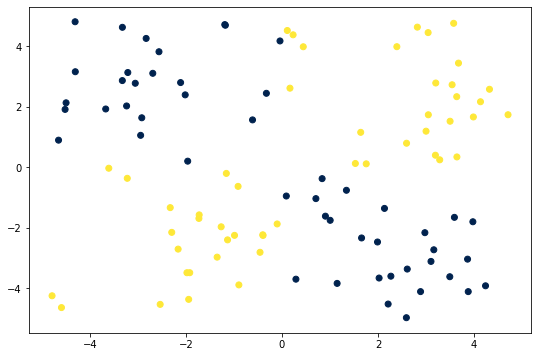

In [182]:
X, y = gen_xor_data(100)

plt.figure(figsize=(9,6))
plt.scatter(x=X[:,0], y=X[:,1], c=y.reshape(-1), cmap='cividis')
plt.show()

## Backprop formulas

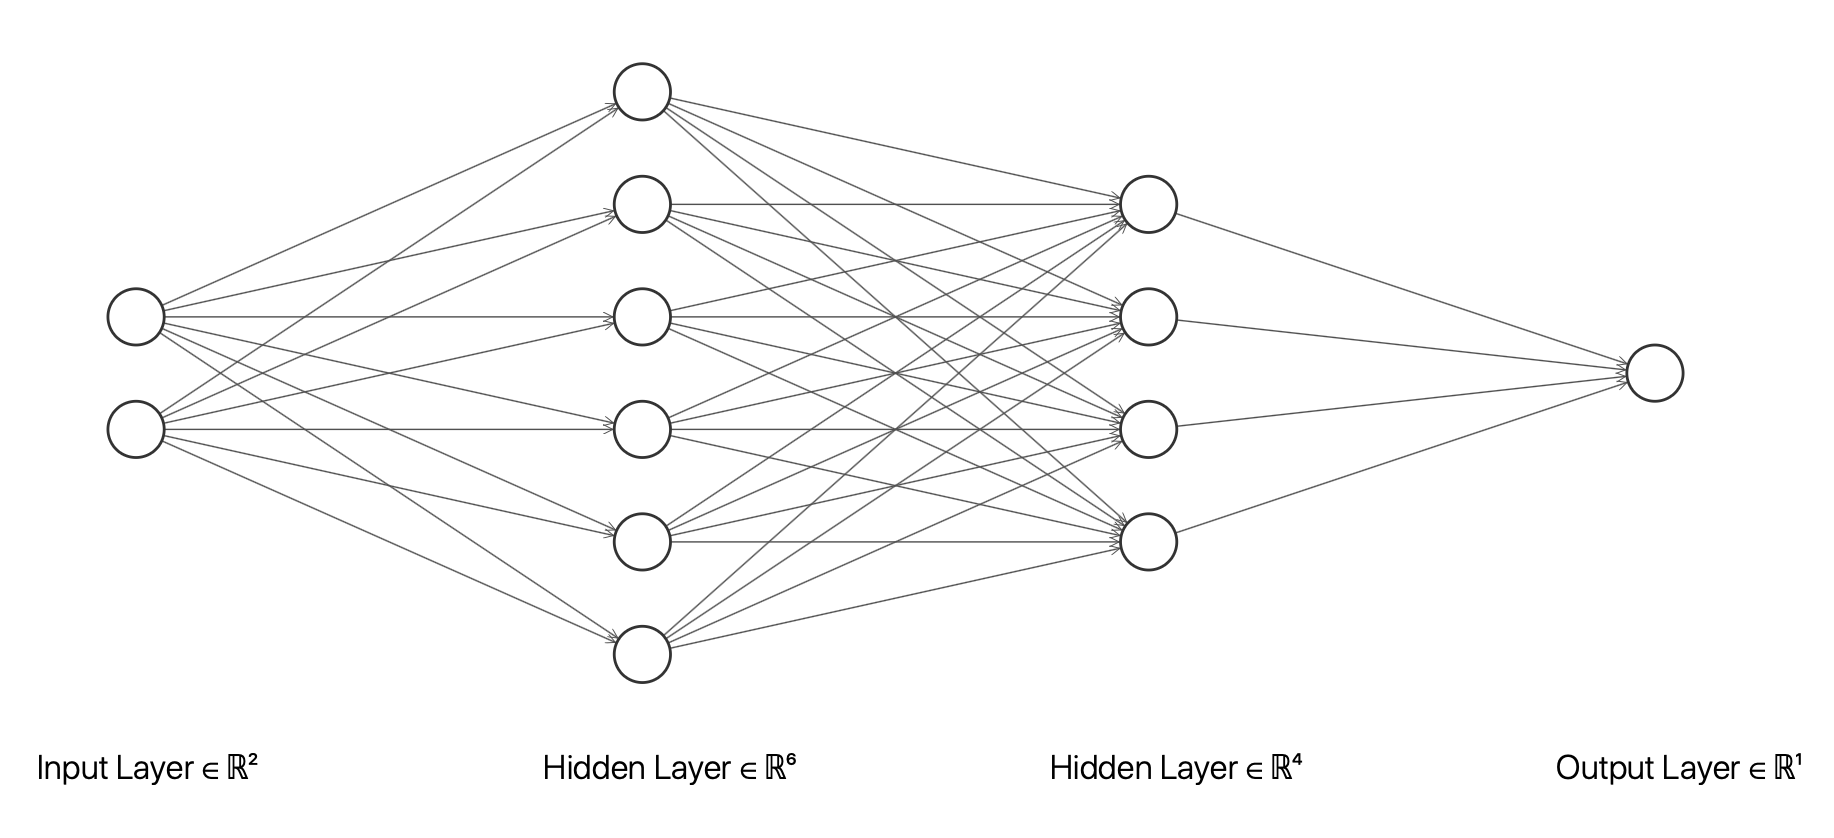

In [137]:
Image('/Users/users/Developer/python/learning/DL/simple_net.png')

$L(a^3 | y) = -ylog(a^3) - (1-y)log(1 - a^3), \space a^3 = \hat{y}$

$\dfrac{\partial L}{\partial \textbf{W}^3} = \dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} \dfrac{\partial z^3}{\partial \textbf{W}^3}$

$\dfrac{\partial L}{\partial b^3} = \dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} \dfrac{\partial z^3}{\partial b^3}$

$\dfrac{\partial L}{\partial \textbf{W}^2} = \dfrac{\partial L}{\partial z^3} \dfrac{\partial z^3}{\partial \textbf{a}^2} \dfrac{\partial \textbf{a}^2}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{W}^2} = \dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} \dfrac{\partial z^3}{\partial \textbf{a}^2} \dfrac{\partial \textbf{a}^2}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{W}^2}$

$\dfrac{\partial L}{\partial b^2} = \dfrac{\partial L}{\partial z^3} \dfrac{\partial z^3}{\partial \textbf{a}^2} \dfrac{\partial \textbf{a}^2}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{b}^2} = \dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} \dfrac{\partial z_3}{\partial \textbf{a}^2} \dfrac{\partial \textbf{a}^2}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{b}^2}$

$\dfrac{\partial L}{\partial \textbf{W}^1} = \dfrac{\partial L}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{a}^1} \dfrac{\partial \textbf{a}^1}{\partial \textbf{z}^1} \dfrac{\partial \textbf{z}^1}{\partial \textbf{W}^1} = \dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} \dfrac{\partial z^3}{\partial \textbf{a}^2} \dfrac{\partial \textbf{a}^2}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{a}^1} \dfrac{\partial \textbf{a}^1}{\partial \textbf{z}^1} \dfrac{\partial \textbf{z}^1}{\partial \textbf{W}^1}$

$\dfrac{\partial L}{\partial \textbf{b}^1} = \dfrac{\partial L}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{a}^1} \dfrac{\partial \textbf{a}^1}{\partial \textbf{z}^1} \dfrac{\partial \textbf{z}^1}{\partial \textbf{b}^1} = \dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} \dfrac{\partial z^3}{\partial \textbf{a}^2} \dfrac{\partial \textbf{a}^2}{\partial \textbf{z}^2} \dfrac{\partial \textbf{z}^2}{\partial \textbf{a}^1} \dfrac{\partial \textbf{a}^1}{\partial \textbf{z}^1} \dfrac{\partial \textbf{z}^1}{\partial \textbf{b}^1}$

## Output layer

$\textbf{W}^3 - \color{blue}{\text{(1x4) matrix}}, b^3 - \color{blue}{\text{scalar}}$

$\dfrac{\partial L}{\partial a^3} = \dfrac{-y}{a^3} + \dfrac{(1-y)}{1-a^3}, \space a^3 = \sigma(z^3)$ - $\color{blue}{\text{scalar}}$ 

$\dfrac{\partial a^3}{\partial z^3} = a^3(1-a^3)$ - $\color{blue}{\text{scalar}}$

$\dfrac{\partial z^3}{\partial {b^3}} = 1$

$\dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} = a^3 - y$

$\dfrac{\partial z^3}{\partial \textbf{W}^3} = 
\begin{bmatrix}
    \frac{\partial z^3}{\partial w^{3}_{1}} & \frac{\partial z^3}{\partial w^{3}_{2}} &
     \frac{\partial z^3}{\partial w^{3}_{3}} & \frac{\partial z^3}{\partial w^{3}_{4}}
\end{bmatrix}$ = 
$\begin{bmatrix}
    \ a^{2}_{1} & a^{2}_{2} & a^{2}_{3} & a^{2}_{4}
\end{bmatrix}$ = $\textbf{a}^{2T}$ - $\color{blue}{\text{(1x4) matrix}}$

$\dfrac{\partial L}{\partial \textbf{W}_3} = (a^3 - y) \textbf{a}^{2T}$

$\dfrac{\partial L}{\partial b^3} = (a^3 - y)$

## 2nd Hidden layer

$\textbf{W}^2 - \color{blue}{\text{(6x4) matrix}}, \textbf{b}^2 - \color{blue}{\text{(1x4) vector}}$

$\dfrac{\partial z^3}{\partial \textbf{a}^2} = \begin{bmatrix}
    \frac{\partial z_3}{\partial a^{2}_{1}} & \frac{\partial z_3}{\partial a^{2}_{2}} &
     \frac{\partial z_3}{\partial a^{2}_{3}} & \frac{\partial z_3}{\partial a^{2}_{4}}
\end{bmatrix} =  \begin{bmatrix}
    \ w^{3}_{1} & w^{3}_{2} & w^{3}_{3} & w^{3}_{4}
\end{bmatrix} - \color{blue}{\text{(1x4) matrix}}$

$\dfrac{\partial \textbf{a}^2}{\partial \textbf{z}^2} = 
\begin{bmatrix}
\\
    \frac{\partial{a^{2}_{1}}}{\partial{z^{2}_{1}}} &
    \frac{\partial{a^{2}_{1}}}{\partial{z^{2}_{2}}} &
    \frac{\partial{a^{2}_{1}}}{\partial{z^{2}_{3}}} &
    \frac{\partial{a^{2}_{1}}}{\partial{z^{2}_{4}}} \\\\
    \frac{\partial{a^{2}_{2}}}{\partial{z^{2}_{1}}} &
    \frac{\partial{a^{2}_{2}}}{\partial{z^{2}_{2}}} &
    \frac{\partial{a^{2}_{2}}}{\partial{z^{2}_{3}}} &
    \frac{\partial{a^{2}_{2}}}{\partial{z^{2}_{4}}} \\\\
    \frac{\partial{a^{2}_{3}}}{\partial{z^{2}_{1}}} &
    \frac{\partial{a^{2}_{3}}}{\partial{z^{2}_{2}}} &
    \frac{\partial{a^{2}_{3}}}{\partial{z^{2}_{3}}} &
    \frac{\partial{a^{2}_{3}}}{\partial{z^{2}_{4}}} \\\\
    \frac{\partial{a^{2}_{4}}}{\partial{z^{2}_{1}}} &
    \frac{\partial{a^{2}_{4}}}{\partial{z^{2}_{2}}} &
    \frac{\partial{a^{2}_{4}}}{\partial{z^{2}_{3}}} &
    \frac{\partial{a^{2}_{4}}}{\partial{z^{2}_{4}}} \\\\
\end{bmatrix}$
=
$\begin{bmatrix}
\\
    g'(z^2_{1}) &
    0 &
    0 &
    0 \\\\
    0 &
    g'(z^2_{2}) &
    0 &
    0 \\\\
    0 &
    0 &
    g'(z^2_{3}) &
    0 \\\\
    0 &
    0 &
    0 &
    g'(z^2_{4}) \\\\
\end{bmatrix} = 
\begin{bmatrix}
\\
    a^2_{1}(1-a^2_{1}) &
    0 &
    0 &
    0 \\\\
    0 &
    a^2_{2}(1-a^2_{2}) &
    0 &
    0 \\\\
    0 &
    0 &
    a^2_{3}(1-a^2_{3}) &
    0 \\\\
    0 &
    0 &
    0 &
    a^2_{4}(1-a^2_{4}) \\\\
\end{bmatrix} - \color{blue}{\text{(4x4) matrix}}$

$\dfrac{\partial \textbf{z}^2}{\partial \textbf{W}^2} = 
\begin{bmatrix}
\\
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{11}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{12}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{13}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{14}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{15}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{16}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{21}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{22}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{23}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{24}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{25}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{26}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{31}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{32}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{33}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{34}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{35}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{36}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{41}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{42}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{43}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{44}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{45}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{46}}} \\\\
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{11}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{12}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{13}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{14}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{15}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{16}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{21}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{22}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{23}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{24}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{25}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{26}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{31}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{32}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{33}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{34}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{35}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{36}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{41}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{42}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{43}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{44}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{45}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{46}}} \\\\
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{11}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{12}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{13}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{14}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{15}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{16}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{21}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{22}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{23}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{24}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{25}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{26}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{31}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{32}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{33}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{34}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{35}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{36}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{41}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{42}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{43}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{44}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{45}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{46}}} \\\\
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{11}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{12}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{13}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{14}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{15}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{16}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{21}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{22}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{23}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{24}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{25}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{26}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{31}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{32}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{33}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{34}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{35}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{36}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{41}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{42}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{43}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{44}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{45}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{46}}} \\\\
\end{bmatrix}
= 
\begin{bmatrix}
\\
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{11}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{12}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{13}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{14}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{15}}} &
    \frac{\partial{z^{2}_{1}}}{\partial{w^{2}_{16}}} &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{21}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{22}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{23}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{24}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{25}}} &
    \frac{\partial{z^{2}_{2}}}{\partial{w^{2}_{26}}} &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{31}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{32}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{33}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{34}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{35}}} &
    \frac{\partial{z^{2}_{3}}}{\partial{w^{2}_{36}}} &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{41}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{42}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{43}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{44}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{45}}} &
    \frac{\partial{z^{2}_{4}}}{\partial{w^{2}_{46}}} \\\\
\end{bmatrix} 
=
\begin{bmatrix}
\\
    a^{1}_{1} &
    a^{1}_{2} &
    a^{1}_{3} &
    a^{1}_{4} &
    a^{1}_{5} &
    a^{1}_{6} &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    a^{1}_{1} &
    a^{1}_{2} &
    a^{1}_{3} &
    a^{1}_{4} &
    a^{1}_{5} &
    a^{1}_{6} &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    a^{1}_{1} &
    a^{1}_{2} &
    a^{1}_{3} &
    a^{1}_{4} &
    a^{1}_{5} &
    a^{1}_{6} &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    0 &
    a^{1}_{1} &
    a^{1}_{2} &
    a^{1}_{3} &
    a^{1}_{4} &
    a^{1}_{5} &
    a^{1}_{6} \\\\
\end{bmatrix} - \color{blue}{\text{(4x24) matrix}}$


$\dfrac{\partial \textbf{z}^{2}}{\partial \textbf{b}^{2}} = 
\begin{bmatrix}
    1 & 0 & 0 & 0 \\\\
    0 & 1 & 0 & 0 \\\\
    0 & 0 & 1 & 0 \\\\
    0 & 0 & 0 & 1 \\\\
\end{bmatrix} - \color{blue}{\text{(4x4) matrix}}$

$\dfrac{\partial L}{\partial z^3} = \dfrac{\partial L}{\partial a^3} \dfrac{\partial a^3}{\partial z^3} = a^3 - y = \delta^{3}$

$\boxed{\delta^{3} = a^3 - y}$

$\dfrac{\partial{L}}{\partial{\mathbf{W}^{2}}} = 
\delta^{3}
\dfrac{d{z^{3}}}{d{\mathbf{z}^{2}}}
\dfrac{\partial{\mathbf{z}^{2}}}{\partial{\mathbf{W}^{2}}}$

$\dfrac{\partial{L}}{\partial{\mathbf{b}^{2}}} = 
\delta^{3}
\dfrac{d{z^{3}}}{d{\mathbf{z}^{2}}}
\dfrac{\partial{\mathbf{z}^{2}}}{\partial{\mathbf{b}^{2}}}$


$\dfrac{\partial{L}}{\partial{\mathbf{z}^{2}}} = 
\delta^{3}
\dfrac{d{z^{3}}}{d{\mathbf{a}^{2}}}
\dfrac{d{a^{2}}}{d{\mathbf{z}^{2}}}$

$\dfrac{\partial{L}}{\partial{\mathbf{z}^{2}}} = \delta^{3}
\begin{bmatrix}
    \ w^{3}_{1} & w^{3}_{2} & w^{3}_{3} & w^{3}_{4}
\end{bmatrix}
\begin{bmatrix}
\\
    a^2_{1}(1-a^2_{1}) &
    0 &
    0 &
    0 \\\\
    0 &
    a^2_{2}(1-a^2_{2}) &
    0 &
    0 \\\\
    0 &
    0 &
    a^2_{3}(1-a^2_{3}) &
    0 \\\\
    0 &
    0 &
    0 &
    a^2_{4}(1-a^2_{4}) \\\\
\end{bmatrix} - \color{blue}{\text{(1x4) matrix}}$, but $\mathbf{z}^{2}$ has dimensions (4x1), so let's transpose

$\boldsymbol{\delta}^{2} = 
\bigg( \dfrac{\partial{L}}{\partial{\mathbf{z}^{2}}}\bigg)^T - \color{blue}{\text{(4x1) matrix}}$


$\boldsymbol{\delta}^{2} =
\begin{bmatrix}
\\
    a^2_{1}(1-a^2_{1}) &
    0 &
    0 &
    0 \\\\
    0 &
    a^2_{2}(1-a^2_{2}) &
    0 &
    0 \\\\
    0 &
    0 &
    a^2_{3}(1-a^2_{3}) &
    0 \\\\
    0 &
    0 &
    0 &
    a^2_{4}(1-a^2_{4}) \\\\
\end{bmatrix} 
\begin{bmatrix}
    \ w^{3}_{1} \\\\ w^{3}_{2} \\\\ w^{3}_{3} \\\\ w^{3}_{4}
\end{bmatrix}
\delta^{3} =
\begin{bmatrix}
\\
    a^2_{1}(1-a^2_{1}) w^{3}_{1} \delta^{3} \\\\
    a^2_{2}(1-a^2_{2}) w^{3}_{2} \delta^{3} \\\\
    a^2_{3}(1-a^2_{3}) w^{3}_{3} \delta^{3} \\\\
    a^2_{4}(1-a^2_{4}) w^{3}_{4} \delta^{3} \\\\
\end{bmatrix} =
\begin{bmatrix}
\\
   w^{3}_{1} \delta^{3} \\\\
   w^{3}_{2} \delta^{3} \\\\
   w^{3}_{3} \delta^{3} \\\\
   w^{3}_{4} \delta^{3} \\\\
\end{bmatrix} \odot g'(\mathbf{z}^2) =
\begin{bmatrix}
\\
   w^{3}_{1} \\\\
   w^{3}_{2} \\\\
   w^{3}_{3} \\\\
   w^{3}_{4} \\\\
\end{bmatrix} \delta^{3} \odot g'(\mathbf{z}^2)$

$\boxed{\boldsymbol{\delta}^{2} = \mathbf{W}^{3T} \delta^{3} \odot g'(\mathbf{z}^2)}$

$\dfrac{\partial{L}}{\partial{\mathbf{W}^{2}}} = 
\dfrac{\partial{L}}{\partial{\mathbf{z}^{2}}}
\dfrac{\partial{\mathbf{z}^{2}}}{\partial{\mathbf{W}^{2}}} =
\mathbf{\delta^{2}}^{T} \frac{\partial{\mathbf{z}^{2}}}{\partial{\mathbf{W}^{2}}} 
=
\begin{bmatrix}
   \delta^{2}_{1} &
   \delta^{2}_{2} &
   \delta^{2}_{3} &
   \delta^{2}_{4} 
\end{bmatrix} 
\begin{bmatrix}
\\
    a^{1}_{1} &
    \cdots &
    a^{1}_{6} &
    0 &
    \cdots &
    0 &
    0 &
    \cdots &
    0 &
    0 &
    \cdots &
    0 \\\\
    0 &
    \cdots &
    0 &
    a^{1}_{1} &
    \cdots &
    a^{1}_{6} &
    0 &
    \cdots &
    0 &
    0 &
    \cdots &
    0 \\\\
    0 &
    \cdots &
    0 &
    0 &
    \cdots &
    0 &
    a^{1}_{1} &
    \cdots &
    a^{1}_{6} &
    0 &
    \cdots &
    0 \\\\
    0 &
    \cdots &
    0 &
    0 &
    \cdots &
    0 &
    0 &
    \cdots &
    0 &
    a^{1}_{1} &
    \cdots &
    a^{1}_{6} \\\\
\end{bmatrix} =
\begin{bmatrix}
   \delta^{2}_{1} a^{1}_{1} & \cdots &  \delta^{2}_{1} a^{1}_{6} &
   \delta^{2}_{2} a^{1}_{1} & \cdots &  \delta^{2}_{2} a^{1}_{6} &
   \delta^{2}_{3} a^{1}_{1} & \cdots &  \delta^{2}_{3} a^{1}_{6} &
   \delta^{2}_{4} a^{1}_{1} & \cdots &  \delta^{2}_{4} a^{1}_{6} 
\end{bmatrix} - \color{blue}{\text{(1x28) matrix}}$

We get the Jacobian Matrix $\frac{\partial L}{\partial \mathbf{W}^2}$ with dimensions (1x28) but $\mathbf{W}^2$ has dimensions (4x6), so we need to reshape this result to get correct dimensions 

$\dfrac{\partial{L}}{\partial{\mathbf{W}^{2}}} 
= 
\begin{bmatrix}
   \delta^{2}_{1} a^{1}_{1} & \cdots &  \delta^{2}_{1} a^{1}_{6} \\\\
   \delta^{2}_{2} a^{1}_{1} & \cdots &  \delta^{2}_{2} a^{1}_{6} \\\\
   \delta^{2}_{3} a^{1}_{1} & \cdots &  \delta^{2}_{3} a^{1}_{6} \\\\
   \delta^{2}_{4} a^{1}_{1} & \cdots &  \delta^{2}_{4} a^{1}_{6} 
\end{bmatrix} 
=
\begin{bmatrix}
   \delta^{2}_{1} \\\\
   \delta^{2}_{2} \\\\
   \delta^{2}_{3} \\\\ 
   \delta^{2}_{4} 
\end{bmatrix} 
\begin{bmatrix}
   a^{1}_{1} & a^{1}_{2} & a^{1}_{3} & a^{1}_{4} & a^{1}_{5} & a^{1}_{6}
\end{bmatrix} =
\boldsymbol{\delta}^2 \mathbf{a^{2T}} - \color{blue}{\text{(4x6) matrix}}
$

$\dfrac{\partial L}{\partial \mathbf{b}^{2}} = \dfrac{\partial L}{\partial \textbf{z}^{2}}
\dfrac{\partial \textbf{z}^{2}}{\partial \textbf{b}^{2}} 
=
\begin{bmatrix}
   \delta^{2}_{1} &
   \delta^{2}_{2} &
   \delta^{2}_{3} & 
   \delta^{2}_{4} 
\end{bmatrix} 
\begin{bmatrix}
    1 & 0 & 0 & 0 \\\\
    0 & 1 & 0 & 0 \\\\
    0 & 0 & 1 & 0 \\\\
    0 & 0 & 0 & 1 
\end{bmatrix}
=
\begin{bmatrix}
   \delta^{2}_{1} &
   \delta^{2}_{2} &
   \delta^{2}_{3} & 
   \delta^{2}_{4} 
\end{bmatrix} 
=
\boldsymbol{\delta}^{2T} - \color{blue}{\text{(1x4) vector}}$, again we need to transpose this result to match the dimensions of $\mathbf{b^2}$ (4x1)

$\boxed{d\textbf{W}^{2} = \boldsymbol{\delta}^{2}\textbf{a}^{2T}}$

$\boxed{d\textbf{b}^{2} = \boldsymbol{\delta}^{2}}$

## 1st Hidden layer

$\textbf{W}_1 - \color{blue}{\text{(2x6) matrix}}, \textbf{b}_1 - \color{blue}{\text{(1x6) vector}}$

$\dfrac{\partial{L}}{\partial{\textbf{W}^{1}}} = 
\dfrac{\partial {L}}{{\partial \textbf{z}^{2}}}
\dfrac{{\partial \textbf{z}^{2}}}{\partial {\textbf{a}^{1}}}
\dfrac{\partial \textbf{a}^{1}}{{\partial \textbf{z}^{1}}}
\dfrac{\partial{\textbf{z}^{1}}}{\partial{\textbf{W}^{1}}}$

$\dfrac{\partial {L}}{\partial {\textbf{b}^{1}}} = 
\dfrac{\partial {L}}{\partial {\textbf{z}^{2}}}
\dfrac{\partial {\textbf{z}^{2}}}{\partial {\textbf{a}^{1}}}
\dfrac{\partial {\textbf{a}^{1}}}{\partial {\textbf{z}^{1}}}
\dfrac{\partial {\textbf{z}^{1}}}{\partial{\textbf{b}^{1}}}$


$\dfrac{\partial{L}}{\partial{\mathbf{z}^{2}}} = \boldsymbol{\delta}^{2T}$

$\dfrac{{\partial \textbf{z}^{2}}}{\partial {\textbf{a}^{1}}}
= 
\begin{bmatrix}
   w^{2}_{11} & w^{2}_{21} & w^{2}_{31} & w^{2}_{41} & w^{2}_{51} & w^{2}_{61} \\
   w^{2}_{21} & w^{2}_{22} & w^{2}_{23} & w^{2}_{24} & w^{2}_{25} & w^{2}_{26} \\
   w^{2}_{31} & w^{2}_{32} & w^{2}_{33} & w^{2}_{34} & w^{2}_{35} & w^{2}_{36} \\
   w^{2}_{41} & w^{2}_{42} & w^{2}_{43} & w^{2}_{44} & w^{2}_{45} & w^{2}_{46} \\
\end{bmatrix}
$

$\dfrac{\partial \textbf{a}^1}{\partial \textbf{z}^1}
=
\begin{bmatrix}
\\
    a^1_{1}(1-a^1_{1}) &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    a^1_{2}(1-a^1_{2}) &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    a^1_{3}(1-a^1_{3}) &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    a^1_{4}(1-a^1_{4}) &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    a^1_{5}(1-a^1_{5}) &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    a^1_{6}(1-a^1_{6}) \\\\
\end{bmatrix}
$

$\dfrac{\partial{\textbf{z}^{1}}}{\partial{\textbf{W}^{1}}}
= 
\begin{bmatrix}
x_{1} &
x_{2} & 
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 \\\\
0 &
0 & 
x_{1} &
x_{2} & 
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 \\\\
0 &
0 & 
0 &
0 &
x_{11} &
x_{21} & 
0 &
0 &
0 &
0 &
0 &
0 \\\\
0 &
0 & 
0 &
0 &
0 &
0 &
x_{1} &
x_{2} & 
0 &
0 &
0 &
0 \\\\
0 &
0 & 
0 &
0 &
0 &
0 &
0 &
0 &
x_{1} &
x_{2} & 
0 &
0 \\\\
0 &
0 & 
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 &
x_{1} &
x_{2} \\\\
\end{bmatrix}
$

$\dfrac{\partial \textbf{z}^{1}}{\partial \textbf{b}^{1}} = 
\begin{bmatrix}
\\
    1 & 0 & 0 & 0 & 0 & 0 \\\\
    0 & 1 & 0 & 0 & 0 & 0 \\\\
    0 & 0 & 1 & 0 & 0 & 0 \\\\
    0 & 0 & 0 & 1 & 0 & 0 \\\\
    0 & 0 & 0 & 0 & 1 & 0 \\\\
    0 & 0 & 0 & 0 & 0 & 1 \\\\
\end{bmatrix}
$

$\dfrac{\partial L}{\partial \mathbf{z}^1} 
= 
\boldsymbol{\delta}^{2T} 
\begin{bmatrix}
\\
   w^{2}_{11} & w^{2}_{21} & w^{2}_{31} & w^{2}_{41} & w^{2}_{51} & w^{2}_{61} \\\\
   w^{2}_{21} & w^{2}_{22} & w^{2}_{23} & w^{2}_{24} & w^{2}_{25} & w^{2}_{26} \\\\
   w^{2}_{31} & w^{2}_{32} & w^{2}_{33} & w^{2}_{34} & w^{2}_{35} & w^{2}_{36} \\\\
   w^{2}_{41} & w^{2}_{42} & w^{2}_{43} & w^{2}_{44} & w^{2}_{45} & w^{2}_{46} \\\\
\end{bmatrix}
\begin{bmatrix}
\\
    a^1_{1}(1-a^1_{1}) &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    a^1_{2}(1-a^1_{2}) &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    a^1_{3}(1-a^1_{3}) &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    a^1_{4}(1-a^1_{4}) &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    a^1_{5}(1-a^1_{5}) &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    a^1_{6}(1-a^1_{6}) \\\\
\end{bmatrix}
$

$\boldsymbol{\delta}^1 = \bigg(\dfrac{\partial L}{\partial \mathbf{z}^1}\bigg)^T$

$\boldsymbol{\delta}^1 
= \begin{bmatrix}
\\
    a^1_{1}(1-a^1_{1}) &
    0 &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    a^1_{2}(1-a^1_{2}) &
    0 &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    a^1_{3}(1-a^1_{3}) &
    0 &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    a^1_{4}(1-a^1_{4}) &
    0 &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    a^1_{5}(1-a^1_{5}) &
    0 \\\\
    0 &
    0 &
    0 &
    0 &
    0 &
    a^1_{6}(1-a^1_{6}) \\\\
\end{bmatrix}
\begin{bmatrix}
\\
   w^{2}_{11} & w^{2}_{12} & w^{2}_{13} & w^{2}_{14} \\\\
   w^{2}_{21} & w^{2}_{22} & w^{2}_{23} & w^{2}_{24} \\\\
   w^{2}_{31} & w^{2}_{32} & w^{2}_{33} & w^{2}_{34} \\\\
   w^{2}_{41} & w^{2}_{42} & w^{2}_{43} & w^{2}_{44} \\\\
   w^{2}_{51} & w^{2}_{52} & w^{2}_{53} & w^{2}_{54} \\\\
   w^{2}_{61} & w^{2}_{62} & w^{2}_{63} & w^{2}_{64} \\\\
\end{bmatrix}
\boldsymbol{\delta}^{2} =
\begin{bmatrix}
\\
   a^1_{1}(1-a^1_{1}) w^{2}_{11} & a^1_{1}(1-a^1_{1}) w^{2}_{12} & a^1_{1}(1-a^1_{1}) w^{2}_{13} & a^1_{1}(1-a^1_{1}) w^{2}_{14} \\\\
   a^1_{2}(1-a^1_{2}) w^{2}_{21} & a^1_{2}(1-a^1_{2}) w^{2}_{22} & a^1_{2}(1-a^1_{2}) w^{2}_{23} & a^1_{2}(1-a^1_{2}) w^{2}_{24} \\\\
   a^1_{3}(1-a^1_{3}) w^{2}_{31} & a^1_{3}(1-a^1_{3}) w^{2}_{32} & a^1_{3}(1-a^1_{3}) w^{2}_{33} & a^1_{3}(1-a^1_{3}) w^{2}_{34} \\\\
   a^1_{4}(1-a^1_{4}) w^{2}_{41} & a^1_{4}(1-a^1_{4}) w^{2}_{42} & a^1_{4}(1-a^1_{4}) w^{2}_{43} & a^1_{4}(1-a^1_{4}) w^{2}_{44} \\\\
   a^1_{5}(1-a^1_{5}) w^{2}_{51} & a^1_{5}(1-a^1_{5}) w^{2}_{52} & a^1_{5}(1-a^1_{5}) w^{2}_{53} & a^1_{5}(1-a^1_{5}) w^{2}_{54} \\\\
   a^1_{6}(1-a^1_{6}) w^{2}_{61} & a^1_{6}(1-a^1_{6}) w^{2}_{62} & a^1_{6}(1-a^1_{6}) w^{2}_{63} & a^1_{6}(1-a^1_{6}) w^{2}_{64} \\\\
\end{bmatrix}
\begin{bmatrix}
\\
   \delta^{2}_{1} \\\\
   \delta^{2}_{2} \\\\
   \delta^{2}_{3} \\\\
   \delta^{2}_{4} \\\\
\end{bmatrix}
=
\begin{bmatrix}
\\
   a^1_{1}(1-a^1_{1}) w^{2}_{11} \delta^{2}_{1} + a^1_{1}(1-a^1_{1}) w^{2}_{12} \delta^{2}_{2} + a^1_{1}(1-a^1_{1}) w^{2}_{13} \delta^{2}_{3} + a^1_{1}(1-a^1_{1}) w^{2}_{14} \delta^{2}_{4} \\\\
   a^1_{2}(1-a^1_{2}) w^{2}_{21} \delta^{2}_{1} + a^1_{2}(1-a^1_{2}) w^{2}_{22} \delta^{2}_{2} + a^1_{2}(1-a^1_{2}) w^{2}_{23} \delta^{2}_{3} + a^1_{2}(1-a^1_{2}) w^{2}_{24} \delta^{2}_{4}\\\\
   a^1_{3}(1-a^1_{3}) w^{2}_{31} \delta^{2}_{1} + a^1_{3}(1-a^1_{3}) w^{2}_{32} \delta^{2}_{2} + a^1_{3}(1-a^1_{3}) w^{2}_{33} \delta^{2}_{3} + a^1_{3}(1-a^1_{3}) w^{2}_{34} \delta^{2}_{4} \\\\
   a^1_{4}(1-a^1_{4}) w^{2}_{41} \delta^{2}_{1} + a^1_{4}(1-a^1_{4}) w^{2}_{42} \delta^{2}_{2} + a^1_{4}(1-a^1_{4}) w^{2}_{43} \delta^{2}_{3} + a^1_{4}(1-a^1_{4}) w^{2}_{44} \delta^{2}_{4} \\\\
   a^1_{5}(1-a^1_{5}) w^{2}_{51} \delta^{2}_{1} + a^1_{5}(1-a^1_{5}) w^{2}_{52} \delta^{2}_{2} + a^1_{5}(1-a^1_{5}) w^{2}_{53} \delta^{2}_{3} + a^1_{5}(1-a^1_{5}) w^{2}_{54} \delta^{2}_{4} \\\\
   a^1_{6}(1-a^1_{6}) w^{2}_{61} \delta^{2}_{1} + a^1_{6}(1-a^1_{6}) w^{2}_{62} \delta^{2}_{2} + a^1_{6}(1-a^1_{6}) w^{2}_{63} \delta^{2}_{3} + a^1_{6}(1-a^1_{6}) w^{2}_{64} \delta^{2}_{4} \\\\
\end{bmatrix}
=
\begin{bmatrix}
\\
   a^1_{1}(1-a^1_{1}) (w^{2}_{11} \delta^{2}_{1} + w^{2}_{21} \delta^{2}_{2} + w^{2}_{31} \delta^{2}_{3} + w^{2}_{41} \delta^{2}_{4}) \\\\
   a^1_{2}(1-a^1_{2}) (w^{2}_{21} \delta^{2}_{1} + w^{2}_{22} \delta^{2}_{2} + w^{2}_{32} \delta^{2}_{3} + w^{2}_{42} \delta^{2}_{4}) \\\\
   a^1_{3}(1-a^1_{3}) (w^{2}_{31} \delta^{2}_{1} + w^{2}_{23} \delta^{2}_{2} + w^{2}_{33} \delta^{2}_{3} + w^{2}_{43} \delta^{2}_{4}) \\\\
   a^1_{4}(1-a^1_{4}) (w^{2}_{41} \delta^{2}_{1} + w^{2}_{24} \delta^{2}_{2} + w^{2}_{34} \delta^{2}_{3} +  w^{2}_{44} \delta^{2}_{4}) \\\\
   a^1_{5}(1-a^1_{5}) (w^{2}_{51} \delta^{2}_{1} + w^{2}_{25} \delta^{2}_{2} + w^{2}_{35} \delta^{2}_{3} + w^{2}_{45} \delta^{2}_{4}) \\\\
   a^1_{6}(1-a^1_{6}) (w^{2}_{61} \delta^{2}_{1} + w^{2}_{26} \delta^{2}_{2} + w^{2}_{36} \delta^{2}_{3} + w^{2}_{46} \delta^{2}_{4}) \\\\
\end{bmatrix}
=
\begin{bmatrix}
\\
   w^{2}_{11} \delta^{2}_{1} + w^{2}_{12} \delta^{2}_{2} + w^{2}_{13} \delta^{2}_{3} + w^{2}_{14} \delta^{2}_{4} \\\\
   w^{2}_{21} \delta^{2}_{1} + w^{2}_{22} \delta^{2}_{2} + w^{2}_{23} \delta^{2}_{3} + w^{2}_{24} \delta^{2}_{4} \\\\
   w^{2}_{31} \delta^{2}_{1} + w^{2}_{32} \delta^{2}_{2} + w^{2}_{33} \delta^{2}_{3} + w^{2}_{34} \delta^{2}_{4} \\\\
   w^{2}_{41} \delta^{2}_{1} + w^{2}_{42} \delta^{2}_{2} + w^{2}_{43} \delta^{2}_{3} + w^{2}_{44} \delta^{2}_{4} \\\\
   w^{2}_{51} \delta^{2}_{1} + w^{2}_{52} \delta^{2}_{2} + w^{2}_{53} \delta^{2}_{3} + w^{2}_{54} \delta^{2}_{4} \\\\
   w^{2}_{61} \delta^{2}_{1} + w^{2}_{62} \delta^{2}_{2} + w^{2}_{63} \delta^{2}_{3} + w^{2}_{64} \delta^{2}_{4}
\\\\   
\end{bmatrix}
\odot
\begin{bmatrix}
\\
    \sigma'(z^1_{1}) \\\\
    \sigma'(z^1_{2}) \\\\
    \sigma'(z^1_{3}) \\\\
    \sigma'(z^1_{4}) \\\\
    \sigma'(z^1_{5}) \\\\
    \sigma'(z^1_{6}) \\\\
\end{bmatrix}
=
\begin{bmatrix}
\\
   w^{2}_{11} \delta^{2}_{1} + w^{2}_{12} \delta^{2}_{2} + w^{2}_{13} \delta^{2}_{3} + w^{2}_{14} \delta^{2}_{4} \\\\
   w^{2}_{21} \delta^{2}_{1} + w^{2}_{22} \delta^{2}_{2} + w^{2}_{23} \delta^{2}_{3} + w^{2}_{24} \delta^{2}_{4} \\\\
   w^{2}_{31} \delta^{2}_{1} + w^{2}_{32} \delta^{2}_{2} + w^{2}_{33} \delta^{2}_{3} + w^{2}_{34} \delta^{2}_{4} \\\\
   w^{2}_{41} \delta^{2}_{1} + w^{2}_{42} \delta^{2}_{2} + w^{2}_{43} \delta^{2}_{3} + w^{2}_{44} \delta^{2}_{4} \\\\
   w^{2}_{51} \delta^{2}_{1} + w^{2}_{52} \delta^{2}_{2} + w^{2}_{53} \delta^{2}_{3} + w^{2}_{54} \delta^{2}_{4} \\\\
   w^{2}_{61} \delta^{2}_{1} + w^{2}_{62} \delta^{2}_{2} + w^{2}_{63} \delta^{2}_{3} + w^{2}_{64} \delta^{2}_{4}
\\\\   
\end{bmatrix}
\odot
\sigma'(\mathbf{z}^1)
=$

$
=
\begin{bmatrix}
\\
   w^{2}_{11} & w^{2}_{12} & w^{2}_{13} & w^{2}_{14} \\\\
   w^{2}_{21} & w^{2}_{22} & w^{2}_{23} & w^{2}_{24} \\\\
   w^{2}_{31} & w^{2}_{32} & w^{2}_{33} & w^{2}_{34} \\\\
   w^{2}_{41} & w^{2}_{42} & w^{2}_{43} & w^{2}_{44} \\\\
   w^{2}_{51} & w^{2}_{52} & w^{2}_{53} & w^{2}_{54} \\\\
   w^{2}_{61} & w^{2}_{62} & w^{2}_{63} & w^{2}_{64} \\\\
\end{bmatrix}
\begin{bmatrix}
\\
   \delta^{2}_{1} \\\\
   \delta^{2}_{2} \\\\
   \delta^{2}_{3} \\\\
   \delta^{2}_{4} \\\\
\end{bmatrix}
\odot
\sigma'(\mathbf{z}^1)
=
\mathbf{W}^{2T} \boldsymbol{\delta}^2 \odot \sigma'(\mathbf{z}^1) - \color{blue}{\text{(6x1) vector}}$, same dims as $\mathbf{z}^1$

$\boxed{\boldsymbol{\delta}^1 = \mathbf{W}^{2T} \boldsymbol{\delta}^2 \odot \sigma'(\mathbf{z}^1)}$

$\dfrac{\partial{L}}{\partial{\textbf{W}^{1}}} = 
\boldsymbol{\delta}^{1T}
\dfrac{\partial{\textbf{z}^{1}}}{\partial{\textbf{W}^{1}}}$

$\dfrac{\partial{L}}{\partial{\textbf{W}^{1}}} 
= 
\begin{bmatrix}
\\
   \delta^{1}_{1} &
   \delta^{1}_{2} &
   \delta^{1}_{3} &
   \delta^{1}_{4} &
   \delta^{1}_{5} &
   \delta^{1}_{6} \\\\
\end{bmatrix}
\begin{bmatrix}
x_{1} &
x_{2} & 
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 \\\\
0 &
0 & 
x_{1} &
x_{2} & 
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 \\\\
0 &
0 & 
0 &
0 &
x_{1} &
x_{2} & 
0 &
0 &
0 &
0 &
0 &
0 \\\\
0 &
0 & 
0 &
0 &
0 &
0 &
x_{1} &
x_{2} & 
0 &
0 &
0 &
0 \\\\
0 &
0 & 
0 &
0 &
0 &
0 &
0 &
0 &
x_{1} &
x_{2} & 
0 &
0 \\\\
0 &
0 & 
0 &
0 &
0 &
0 &
0 &
0 &
0 &
0 &
x_{1} &
x_{2} \\\\
\end{bmatrix}
$

$=
\begin{bmatrix}
\\
   \delta^{1}_{1} x_1 & \delta^{1}_{1} x_2 & 
   \delta^{1}_{2} x_1 & \delta^{1}_{2} x_2 &
   \delta^{1}_{3} x_1 & \delta^{1}_{3} x_2 &
   \delta^{1}_{4} x_1 & \delta^{1}_{4} x_2 &
   \delta^{1}_{5} x_1 & \delta^{1}_{5} x_2 &
   \delta^{1}_{6} x_1 & \delta^{1}_{6} x_2 \\\\
\end{bmatrix} -  \color{blue}{\text{(1x12) vector}}$

$d\mathbf{W}^1 
= 
\begin{bmatrix}
\\
   \delta^{1}_{1} x_1 & \delta^{1}_{1} x_2 \\\\
   \delta^{1}_{2} x_1 & \delta^{1}_{2} x_2 \\\\
   \delta^{1}_{3} x_1 & \delta^{1}_{3} x_2 \\\\
   \delta^{1}_{4} x_1 & \delta^{1}_{4} x_2 \\\\
   \delta^{1}_{5} x_1 & \delta^{1}_{5} x_2 \\\\
   \delta^{1}_{6} x_1 & \delta^{1}_{6} x_2 \\\\
\end{bmatrix}
=
\begin{bmatrix}
\\
   \delta^{1}_{1} \\\\
   \delta^{1}_{2} \\\\
   \delta^{1}_{3} \\\\
   \delta^{1}_{4} \\\\
   \delta^{1}_{5} \\\\
   \delta^{1}_{6} \\\\
\end{bmatrix}
\begin{bmatrix}
\\
   x_1 & x_2 \\\\
\end{bmatrix}
$

$\boxed{d\mathbf{W}^1
=
\boldsymbol{\delta}^1 \mathbf{x}^T}$

$\boxed{d\textbf{b}^{1} = \boldsymbol{\delta}^{1}}$

## Summary

### Third Layer

$\boxed{\delta^{3} = a^3 - y}$

$\boxed{\dfrac{\partial L}{\partial \textbf{W}_3} = d\mathbf{W}^3 = (a^3 - y) \textbf{a}^{2T}}$

$\boxed{\dfrac{\partial L}{\partial b^3} = d\mathbf{b}^3 = (a^3 - y)}$

### Second Layer

$\boxed{\boldsymbol{\delta}^{2} = \mathbf{W}^{3T} \delta^{3} \odot g'(\mathbf{z}^2)}$

$\boxed{d\textbf{W}^{2} = \boldsymbol{\delta}^{2}\textbf{a}^{2T}}$

$\boxed{d\textbf{b}^{2} = \boldsymbol{\delta}^{2}}$

### First Layer

$\boxed{\boldsymbol{\delta}^1 = \mathbf{W}^{2T} \boldsymbol{\delta}^2 \odot \sigma'(\mathbf{z}^1)}$

$\boxed{d\mathbf{W}^1
=
\boldsymbol{\delta}^1 \mathbf{x}^T}$

$\boxed{d\textbf{b}^{1} = \boldsymbol{\delta}^{1}}$

# Model

## Torch Benchmark

In [159]:
import torch
from torch import nn
from torch import optim
from torch.nn import BCEWithLogitsLoss

class MLP(nn.Module):
    def __init__(self,):
        super().__init__()
        self.fc1 = nn.Linear(2,6)
        self.fc2 = nn.Linear(6,4)
        self.fc3 = nn.Linear(4,1)
        self.act = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        
        x = self.fc2(x)
        x = self.act(x)
        
        x = self.fc3(x)
        return x

X, target = gen_xor_data(n_samples=1000, data_type='torch')
print('X, y shapes:', X.shape, target.shape)


model = MLP()
#optimizer = optim.Adam(model.parameters(), lr=0.1)
optimizer = optim.SGD(model.parameters(), lr=0.8)
criterion = BCEWithLogitsLoss()
sigmoid = nn.Sigmoid()

ep_logs = [] 
loss_logs = []

n_epochs = 1000
for epoch in range(1, n_epochs+1):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, target)
    pred = sigmoid(output)
    pred = torch.ge(pred, 0.5).float()
    accuracy = torch.sum(pred == target)/len(target)
    loss.backward()
    optimizer.step()
    ep_logs.append(epoch)
    loss_logs.append(loss.item())
    print('epoch:', epoch) 
    print('loss:', loss.item())
    print('accuracy', accuracy.item())
    print()

X, y shapes: torch.Size([1000, 2]) torch.Size([1000, 1])
epoch: 1
loss: 0.6934118866920471
accuracy 0.49399998784065247

epoch: 2
loss: 0.6933789849281311
accuracy 0.5080000162124634

epoch: 3
loss: 0.6933580636978149
accuracy 0.5080000162124634

epoch: 4
loss: 0.6933408379554749
accuracy 0.5080000162124634

epoch: 5
loss: 0.6933249235153198
accuracy 0.5080000162124634

epoch: 6
loss: 0.6933093070983887
accuracy 0.5080000162124634

epoch: 7
loss: 0.6932939291000366
accuracy 0.5080000162124634

epoch: 8
loss: 0.6932786107063293
accuracy 0.5080000162124634

epoch: 9
loss: 0.6932634115219116
accuracy 0.5080000162124634

epoch: 10
loss: 0.6932482123374939
accuracy 0.5080000162124634

epoch: 11
loss: 0.6932332515716553
accuracy 0.5080000162124634

epoch: 12
loss: 0.6932181715965271
accuracy 0.5080000162124634

epoch: 13
loss: 0.6932032704353333
accuracy 0.5080000162124634

epoch: 14
loss: 0.6931883692741394
accuracy 0.5080000162124634

epoch: 15
loss: 0.6931735873222351
accuracy 0.508000016

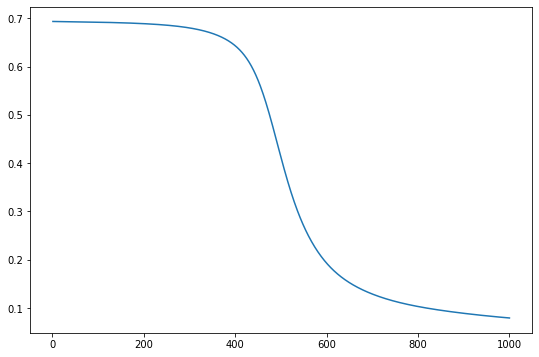

In [160]:
plt.figure(figsize=(9,6))
plt.plot(ep_logs, loss_logs)
plt.show()

## NN from scratch (numpy)

In [154]:
class Network:
    def __init__(self, X, y, lr=0.1, seed=21, n_epochs=1000,
                 W1 = (6,2), b1 = (6,1),
                 W2 = (4,6), b2 = (4,1),
                 W3 = (1,4), b3 = 1):
        self.X = X
        self.y = y
        self.lr = lr
        self.n_epochs = n_epochs
        self.n_samples = y.shape[0]
        np.random.seed(seed)
        self.W1 = np.random.random(size=W1)
        self.b1 = np.random.random(size=b1)
        self.W2 = np.random.random(size=W2)
        self.b2 = np.random.random(size=b2)
        self.W3 = np.random.random(size=W3)
        self.b3 = np.random.random(size=b3)
    
    def plot(self, size=(9,6)):
        plt.figure(figsize=size)
        plt.plot(self.ep_logs[3:], self.loss_logs[3:])
        plt.show()
    
    def zero_grad(self):
        self.gradients = {'dW3': [], 'db3': [],
                          'dW2': [], 'db2': [],
                          'dW1': [], 'db1': []}
    
    def sigmoid(self, x, eps=1e-5):
        return 1/((1 + np.exp(-x)) + eps)

    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def log_loss(self, y, y_hat):
        if y == 1:
            loss = -np.log(y_hat)
        if y == 0:
            loss = -np.log(1 - y_hat)
        return loss
    
    def forward_pass(self, x):
        self.z1 = self.W1 @ x + self.b1 # (6,2) x (2,1) -> (6,1)
        self.a1 = self.sigmoid(self.z1)
        
        self.z2 = self.W2 @ self.a1 + self.b2 # (4,6) x (6,1) -> (4,1)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = self.W3 @ self.a2 + self.b3 # (1,4) x (4,1) -> scalar
        self.a3 = self.sigmoid(self.z3)
        return self.a3
    
    def backprop(self, x, y):
        delta3 = self.a3 - y     # scalar
        dW3 = delta3 * self.a2.T # (1, 4)
        db3 = delta3             # scalar

        dsigmoid_dz2 = self.sigmoid_prime(self.z2) # (4, 1)
        delta2 = self.W3.T * delta3 * dsigmoid_dz2 # (4,1) * scalar * (4, 1) , * elementwise multiplication
        dW2 = delta2 @ self.a1.T                   # (4, 1) x (1, 6) -> (4, 6)
        db2 = delta2

        dsigmoid_dz1 = self.sigmoid_prime(self.z1) # (6, 1)
        delta1 = self.W2.T @ delta2 * dsigmoid_dz1 # (6, 4) x (4, 1) * (6, 1) 
        dW1 = delta1 @ x.reshape(1,2)
        db1 = delta1
        
        self.gradients['dW3'].append(dW3)
        self.gradients['db3'].append(db3)
        self.gradients['dW2'].append(dW2)
        self.gradients['db2'].append(db2)
        self.gradients['dW1'].append(dW1)
        self.gradients['db1'].append(db1)
        
    def update_weights(self,):
        dW3 = np.mean(np.array(self.gradients['dW3']), axis=0).reshape(1,4)
        db3 = np.mean(np.array(self.gradients['db3']), axis=0)
        dW2 = np.mean(np.array(self.gradients['dW2']), axis=0)
        db2 = np.mean(np.array(self.gradients['db2']), axis=0)
        dW1 = np.mean(np.array(self.gradients['dW1']), axis=0)
        db1 = np.mean(np.array(self.gradients['db1']), axis=0)
        
        self.W3 = self.W3 - self.lr * dW3
        self.b3 = self.b3 - self.lr * db3

        self.W2 = self.W2 - self.lr * dW2
        self.b2 = self.b2 - self.lr * db2

        self.W1 = self.W1 - self.lr * dW1
        self.b1 = self.b1 - self.lr * db1
        
    def train_loop(self,):
        self.ep_logs = []
        self.loss_logs = [] 
        for epoch in range(self.n_epochs):
            self.zero_grad()
            
            running_loss = []
            correct = 0
            for i in range(self.n_samples):
                x = self.X[:,i].reshape(2,1)
                target = self.y[i]
                output = self.forward_pass(x)
                running_loss.append(self.log_loss(target, output))
                correct += int(output >= 0.5) == target
                self.backprop(x, target)
            
            self.update_weights()
            
            accuracy = correct/self.n_samples
            loss = np.mean(running_loss)
            self.loss_logs.append(loss)
            self.ep_logs.append(epoch)
            print('epoch:', epoch)
            print('loss', loss)
            print('accuracy', accuracy)
            print()

In [155]:
params = {'W1':(6,2), 'b1':(6,1),
          'W2':(4,6), 'b2':(4,1),
          'W3':(1,4), 'b3':1}

X, y = gen_xor_data(n_samples=1000, transpose=True, data_type='numpy')
print('X, y shapes:', X.shape, y.shape)


net = Network(X, y, lr=0.9, n_epochs=1000, **params)
net.W1.shape, net.W2.shape, net.W3.shape

X, y shapes: (2, 1000) (1000, 1)


((6, 2), (4, 6), (1, 4))

In [156]:
net.train_loop()

epoch: 0
loss 1.8880587734156948
accuracy [0.508]

epoch: 1
loss 1.087650679563524
accuracy [0.508]

epoch: 2
loss 0.7236130828458714
accuracy [0.508]

epoch: 3
loss 0.6943483918240602
accuracy [0.508]

epoch: 4
loss 0.6941820030366272
accuracy [0.364]

epoch: 5
loss 0.6941450756576345
accuracy [0.358]

epoch: 6
loss 0.6941090497969808
accuracy [0.361]

epoch: 7
loss 0.6940736277317062
accuracy [0.364]

epoch: 8
loss 0.6940387904734553
accuracy [0.363]

epoch: 9
loss 0.6940045199826209
accuracy [0.365]

epoch: 10
loss 0.6939707985610657
accuracy [0.37]

epoch: 11
loss 0.693937608842545
accuracy [0.374]

epoch: 12
loss 0.6939049337845564
accuracy [0.378]

epoch: 13
loss 0.6938727566602447
accuracy [0.382]

epoch: 14
loss 0.6938410610503551
accuracy [0.389]

epoch: 15
loss 0.6938098308352416
accuracy [0.398]

epoch: 16
loss 0.6937790501869311
accuracy [0.405]

epoch: 17
loss 0.6937487035612473
accuracy [0.411]

epoch: 18
loss 0.6937187756899984
accuracy [0.413]

epoch: 19
loss 0.69368925

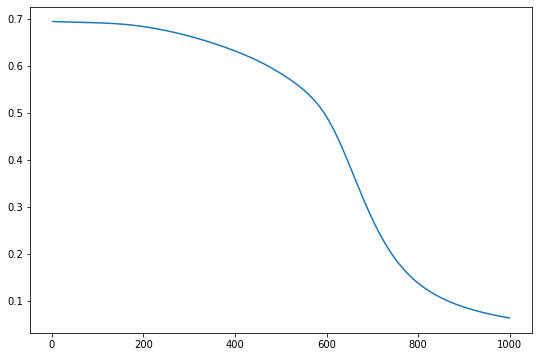

In [157]:
net.plot()